In [ ]:
%pip install pandas seaborn

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import  rc

# 폰트 파일 경로를 직접 지정
font_path = 'C:/Windows/Fonts/Gaesung.ttf'  # 실제 경로로 바꿔야 함
font_name = fm.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

plt.title('한글 제목 테스트')
plt.plot([1, 2, 3], [1, 4, 9])
plt.xlabel('X축')
plt.ylabel('Y축')
plt.show()

In [25]:
import pandas as pd
train = pd.read_csv('train.csv')
train['가해운전자 연령']

0        51세
1        39세
2        70세
3        49세
4        30세
        ... 
39604    52세
39605    60세
39606    60세
39607    40세
39608    27세
Name: 가해운전자 연령, Length: 39609, dtype: object

In [26]:
import re
def extract_and_convert_to_int(data):    
    numbers = re.findall(r'\d+',data)
    return int(numbers[0]) if numbers else pd.NA # 결측치

In [27]:
train['가해운전자 연령'] = train['가해운전자 연령'].apply(extract_and_convert_to_int)

In [28]:
train['가해운전자 연령']

0        51
1        39
2        70
3        49
4        30
         ..
39604    52
39605    60
39606    60
39607    40
39608    27
Name: 가해운전자 연령, Length: 39609, dtype: object

In [29]:
train['가해운전자 연령'].isna().sum()

np.int64(994)

In [30]:
train['가해운전자 연령'] = train['가해운전자 연령'].dropna().astype(int)

In [31]:
train['가해운전자 연령']

0        51.0
1        39.0
2        70.0
3        49.0
4        30.0
         ... 
39604    52.0
39605    60.0
39606    60.0
39607    40.0
39608    27.0
Name: 가해운전자 연령, Length: 39609, dtype: float64

In [32]:
# 히스토그램 : 전체적인 연령분포
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


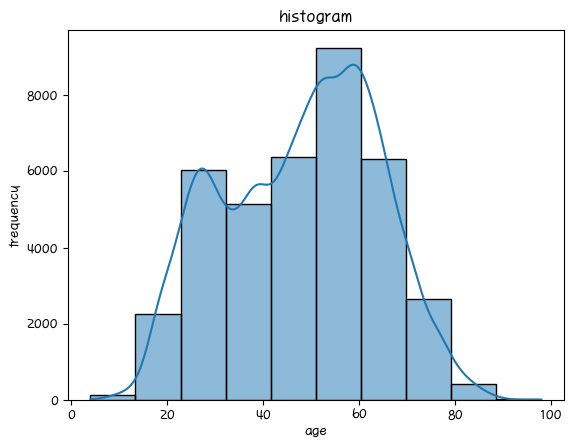

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(train,x='가해운전자 연령',bins=10,kde=True)
plt.title('histogram')
plt.xlabel('age')
plt.ylabel('frequency')
plt.show()

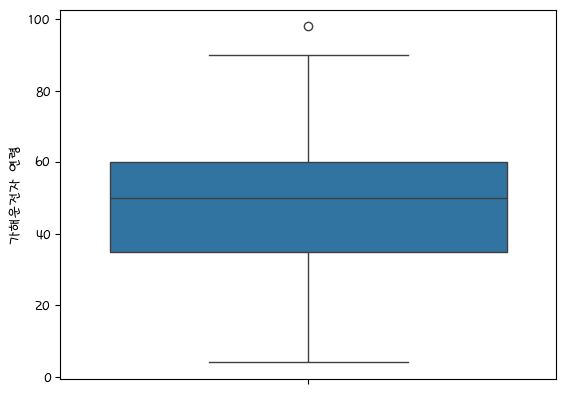

In [34]:
 # boxplot  : 이상치를 찾아낼때.  사분위수를 이용  
sns.boxplot(train, y='가해운전자 연령')
plt.show()


In [35]:
# 수치형 데이터 VS 범주형 데이터
train.head(1)

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,...,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
0,ACCIDENT_00000,2019-01-01 00,화요일,맑음,대구광역시 중구 대신동,단일로 - 기타,건조,차대사람,길가장자리구역통행중,안전운전불이행,...,상해없음,보행자,여,70세,중상,0,1,0,0,5


In [36]:
train.select_dtypes(include=['int','float']).columns

Index(['가해운전자 연령', '사망자수', '중상자수', '경상자수', '부상자수', 'ECLO'], dtype='object')

In [37]:
train.select_dtypes(include='object').columns[2:]

Index(['요일', '기상상태', '시군구', '도로형태', '노면상태', '사고유형', '사고유형 - 세부분류', '법규위반',
       '가해운전자 차종', '가해운전자 성별', '가해운전자 상해정도', '피해운전자 차종', '피해운전자 성별',
       '피해운전자 연령', '피해운전자 상해정도'],
      dtype='object')

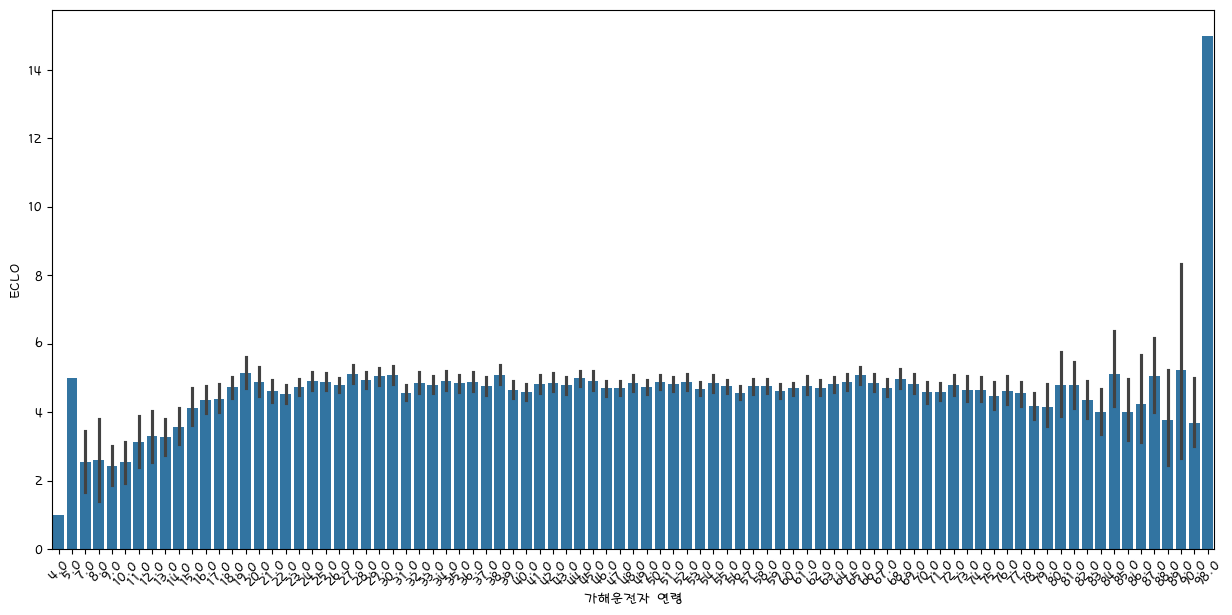

In [38]:
plt.figure(figsize=(15,7))
sns.barplot(train, x='가해운전자 연령', y = 'ECLO')
plt.xticks(rotation=45)
plt.show()

In [39]:
train.select_dtypes(exclude='object').columns

Index(['가해운전자 연령', '사망자수', '중상자수', '경상자수', '부상자수', 'ECLO'], dtype='object')

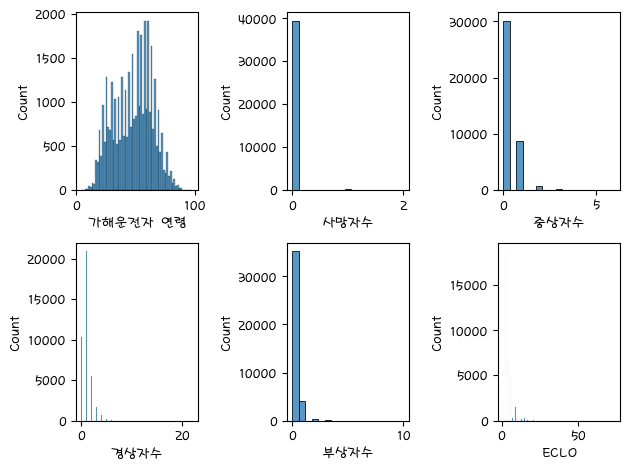

In [40]:
# 수치형 데이터 시각화
for idx, col in  enumerate(train.select_dtypes(exclude='object').columns):
    plt.subplot(2,3,idx+1)
    sns.histplot(train, x=col)
plt.tight_layout()   
